In [2]:
from pydemic.all import *
import mundi

# Region report

This notebook shows how to create a simple report for the number of cases and forecasts 
for a given region. The first step is, of course, to select a region to analyze. We 
select "Brazil" by default, but let the user change it, if desired.

In [9]:
region = mundi.region(input("Select region (or leave empty for Brazil): ") or "BR")
print()
print(region)

Select region (or leave empty for Brazil): 

Mundi Region
id       : BR
name     : Brazil
type     : country
subtype  : None


## Curve of cases and other information

Mundi is a database of information about regions of the world. Those regions can be countries, cities, continents, states, etc and it associates information such as population, age distribution, and many more. Note that not all regions have all information points. Sometimes data is simply not available and sometimes data does not make much sense for the specified region (e.g., what is the population of the Pacific Ocean?).

Pydemic extends mundi regions with a few properties to integrate then with epidemic information. This means that is easy to obtain the curves of confirmed cases and deaths for any particular country or region of the world. Just use one of the methods in the region.pydemic property.

In [50]:
help(region.pydemic)

Help on PydemicProperty in module pydemic.region.pydemic_property object:

class PydemicProperty(pydemic.region.base.RegionProperty)
 |  PydemicProperty(region)
 |  
 |  Implements the "pydemic" property mokey-patched into mundi region objects.
 |  
 |  Method resolution order:
 |      PydemicProperty
 |      pydemic.region.base.RegionProperty
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  disease_params(self, disease=None, **kwargs) -> pydemic.diseases.disease_params.DiseaseParams
 |      Return an object with all disease params associated with region.
 |  
 |  epidemic_curve(self, disease=None, **kwargs) -> pandas.core.frame.DataFrame
 |      Return epidemic curves for region.
 |      
 |      See Also:
 |          :method:`pydemic.diseases.Disease.epidemic_curve`
 |  
 |  estimate_K(self, disease=None, **kwargs) -> pydemic.types.ValueStd
 |      Compute K from the epidemic curves. This is function is just a
 |      shortcut to :func:`fit.estimate_K` that automatical

Let us try the region.pydemic.epidemic_curve to fetch data.

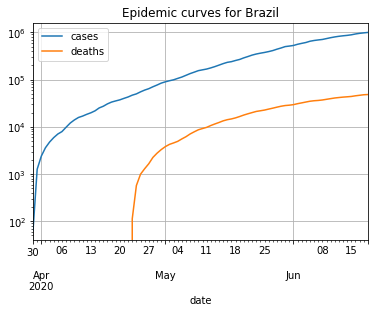

In [23]:
curves = region.pydemic.epidemic_curve()
curves.plot(logy=True, grid=True, title=f'Epidemic curves for {region.name}')

## Initializing a model

We use data on cases and deaths to initialize the model.

/usr/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
/usr/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


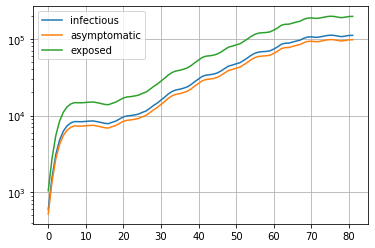

In [62]:
m = SEAIR(region=region)
m.set_cases(curves)
m.plot(['infectious', 'asymptomatic', 'exposed'], logy=True)

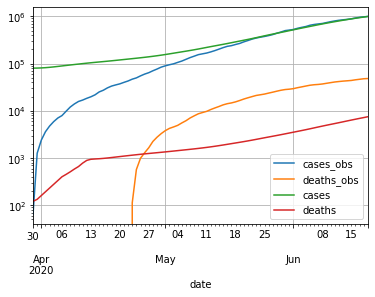

In [66]:
cm = m.clinical()
curve.rename(columns={'cases': 'cases_obs', 'deaths': 'deaths_obs'}).plot(logy=True)
cm.plot(["cases", "deaths"], dates=True, logy=True)

In [68]:
cm["deaths"].iloc[-1] / curves["deaths"].iloc[-1]

0.15536751804578935

In [48]:
curves["deaths"]

date
2020-03-30        0
2020-03-31        0
2020-04-01        0
2020-04-02        0
2020-04-03        0
              ...  
2020-06-15    43903
2020-06-16    45315
2020-06-17    46482
2020-06-18    47692
2020-06-19    48209
Name: deaths, Length: 82, dtype: int64

In [51]:
region.pydemic.epidemic_curve?

In [54]:
covid19.epidemic_curve(region, real=True)

,cases,deaths
date,,
2020-03-30,3.268339e+02,0
2020-03-31,6.365719e+03,0
2020-04-01,1.204760e+04,0
2020-04-02,1.810660e+04,0
2020-04-03,2.390916e+04,0
...,...,...
2020-06-15,4.455606e+06,43903
2020-06-16,4.640418e+06,45315
2020-06-17,4.786070e+06,46482


KeyError: ('reported_cases', None)